# **Ahmed Islam**
# **Hope To Skill AI Course Assignment 8**


# This assignment cover Following concepts.
## **Perform EDA on the Dataset Which should include**
**a. Visualization and explore the data using seaborn**
1.  Add your findings about the data under each graph in the code notebook
**b. Identify the data patterns if exist for single/multiple variables**
2. Write your findings under the plots or code that identify the pattern
**c. Clean the dataset, remove the missing values as mentioned in the Lectures 15**
3. Explain your approach in the Collab notebook text cell
**d. Select the target variable and clearly mention the reason for selecting it.**
## **e. Transform the Dataset**
4. Transform the whole dataset (Features , Target Variable)
**f. Split the Dataset into train and test set**
# **2. Use the Scikit Learn Library to fit the Regression Models**
1. Use the different regression models
2. Linear regression
3. Decision tree Regressor
4. Random forest Regressor
5. Gradient boosting Regressor
# **3.You have to report the MSE result with the following combinations**
1. Without feature scaling
2. With only feature scaling (without target variable)
3. With feature and target variable scaling
**c. Display the ranking of different models according to their MSE value**

# Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category =FutureWarning)
plt.rcParams["figure.figsize"] = [10,5]

## Data import

In [19]:
#loading csv file
data=pd.read_csv("/content/USA_Housing.csv")

## EDA on the dataset which should include:

In [29]:
data.head()

,AreaIncome,AreaHouseAge,num of rooms,num of bedrooms,population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [30]:
data.tail()

,AreaIncome,AreaHouseAge,num of rooms,num of bedrooms,population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [20]:
data=data.rename(columns={"Avg. Area Income":"AreaIncome","Avg. Area House Age":"AreaHouseAge","Avg. Area Number of Rooms":"num of rooms",'Avg. Area Number of Bedrooms':'num of bedrooms','Area Population':'population',})

In [5]:
data.head()

,AreaIncome,AreaHouseAge,num of rooms,num of bedrooms,population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [31]:
data.shape

(5000, 7)

In [32]:
#checking for null values
data.isnull().sum()

AreaIncome         0
AreaHouseAge       0
num of rooms       0
num of bedrooms    0
population         0
Price              0
Address            0
dtype: int64

**A heatmap will help better visualize for missing values.**

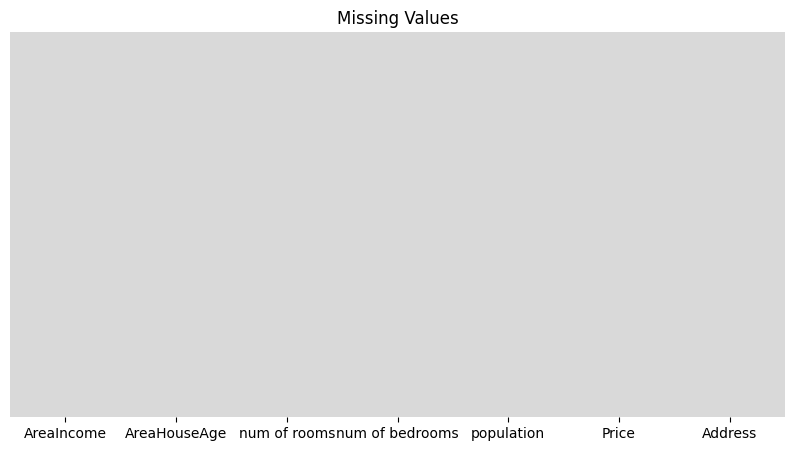

In [33]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False , cmap='tab20c_r')
plt.title("Missing Values")
plt.show()

 **There is no null value so no need to replacing or deleting the data**

**In EDA process, we handle missing values by usnig simple approach "Dropping missing Values". This approach was choosen because the missing data is seemed random and did not follow a specific pattern. Note that is approach is not always suitable it vary and depends on data.**

In [34]:
data.dtypes

AreaIncome         float64
AreaHouseAge       float64
num of rooms       float64
num of bedrooms    float64
population         float64
Price              float64
Address             object
dtype: object

In [35]:
data.describe()

,AreaIncome,AreaHouseAge,num of rooms,num of bedrooms,population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**I am Dropping Adress coulmn Because there is no need During training the model.**

In [36]:
df=data.drop('Address', axis=1)

In [37]:
df.head()

,AreaIncome,AreaHouseAge,num of rooms,num of bedrooms,population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


# Data visualization

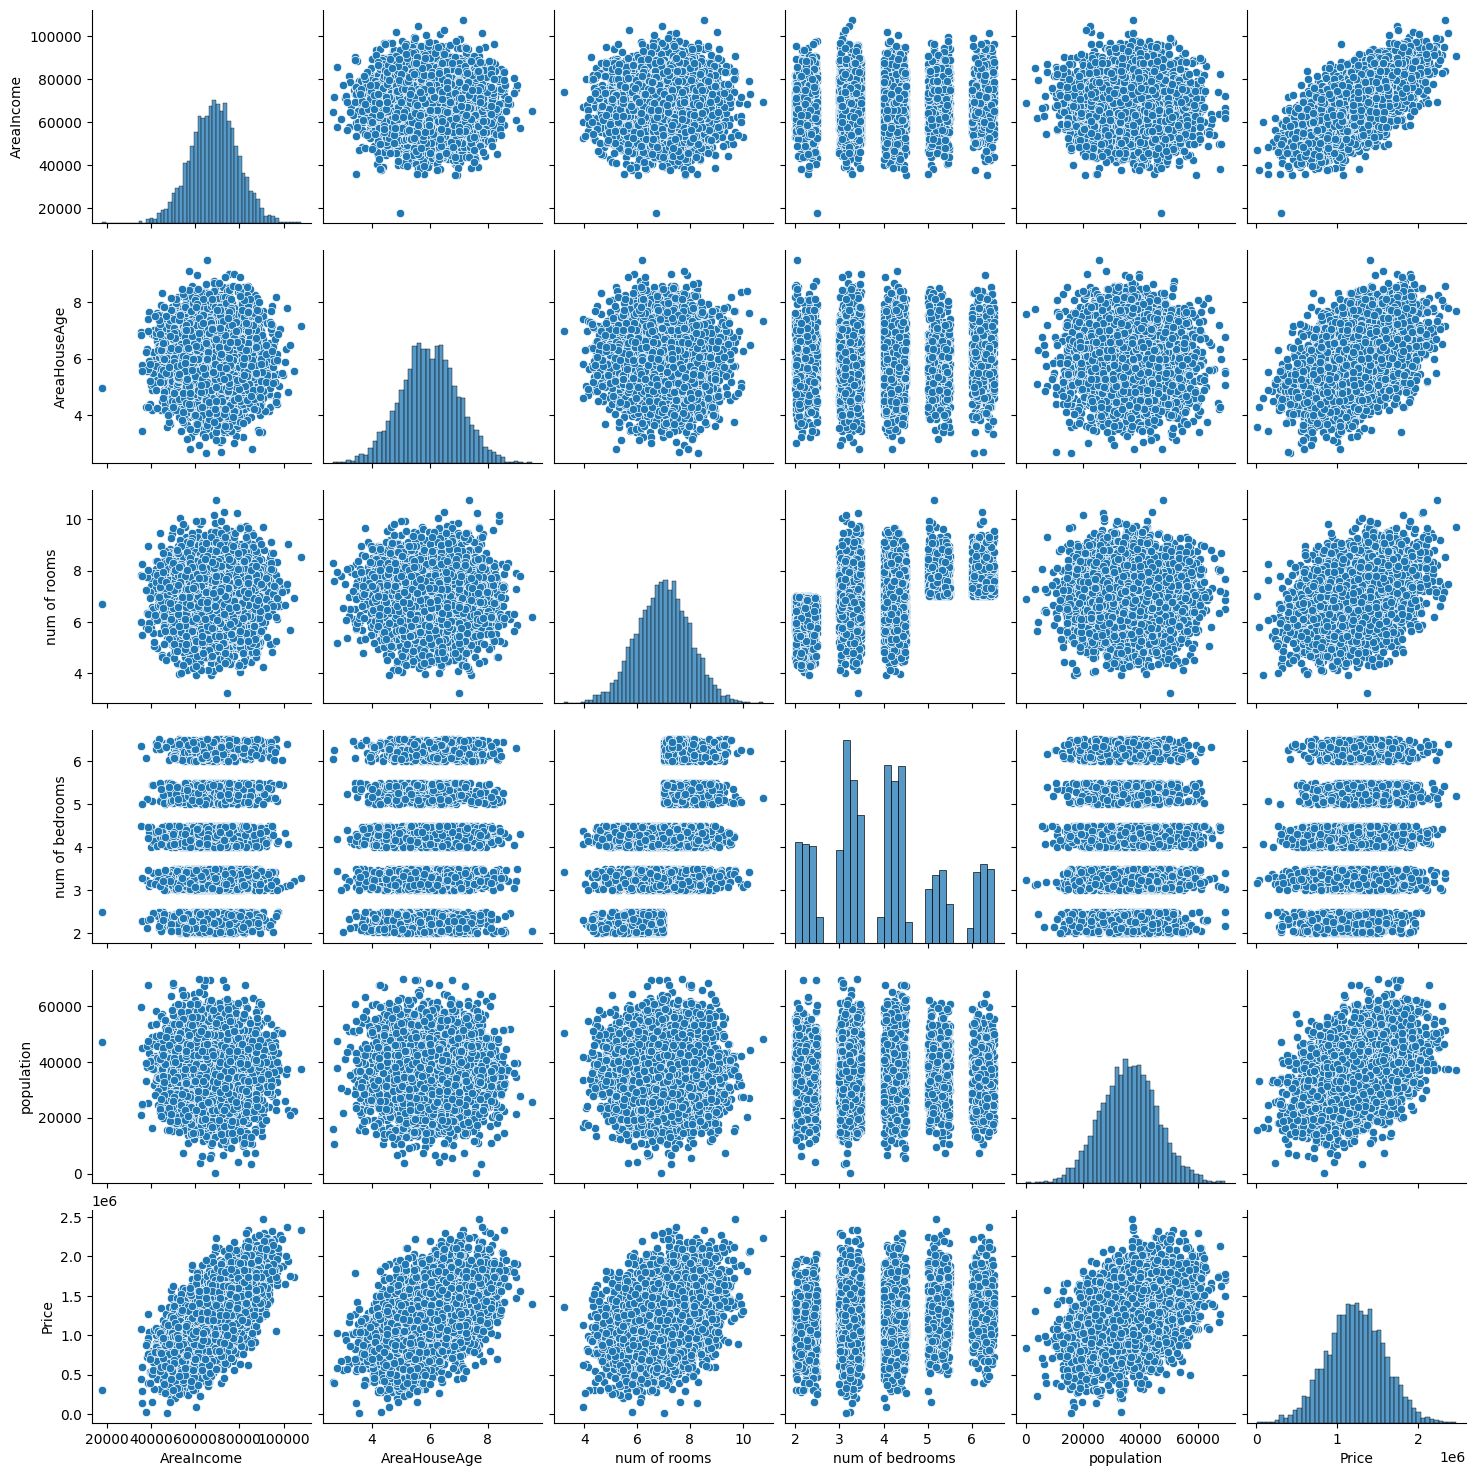

In [38]:
sns.pairplot(df)

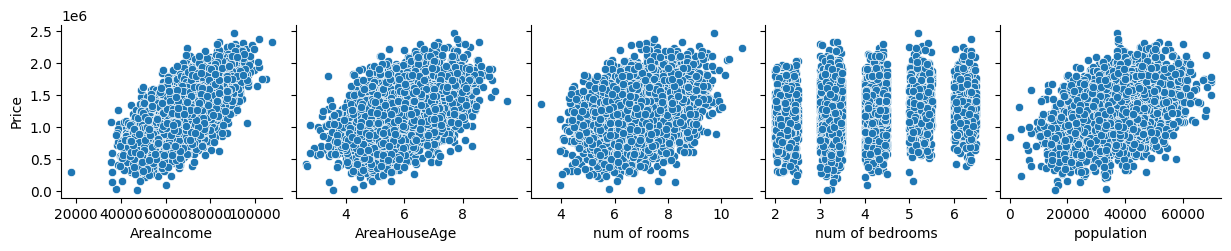

In [39]:
sns.pairplot(data, x_vars=['AreaIncome','AreaHouseAge','num of rooms','num of bedrooms','population'], y_vars='Price', kind='scatter')

**i create scatter plot for "price"feature againt each feature that was present in the Data just like "Area income","AreaHourseAge", "num of rooms", "num of bedrooms" and "population". This plot describe the relationship between price and all feature that are in the data File.**

#Heat Map

<Axes: >

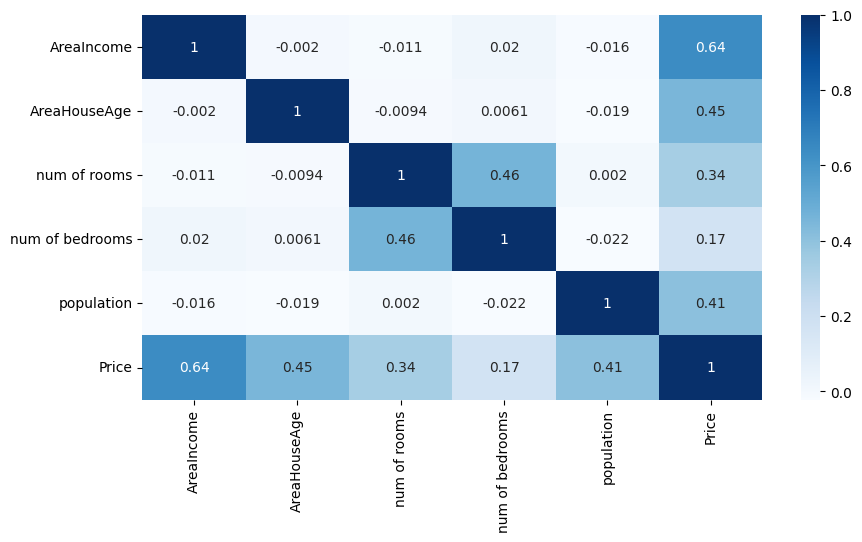

In [40]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

<Axes: xlabel='Price', ylabel='Density'>

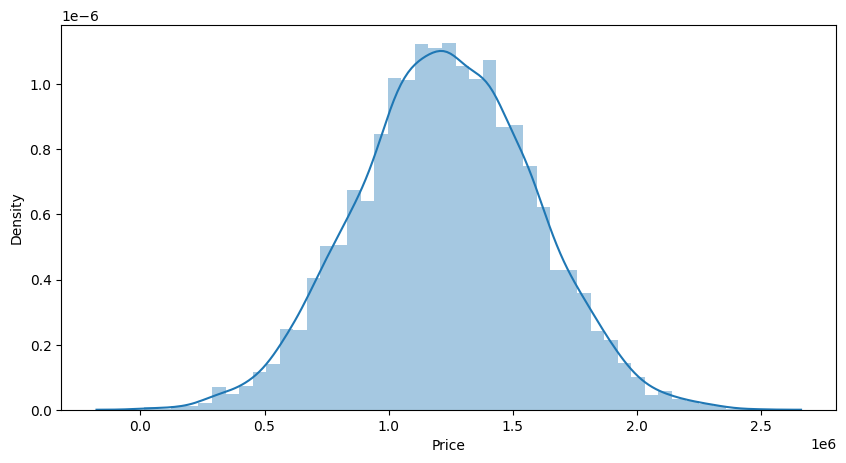

In [41]:
sns.distplot(df.Price)

# Spliting Targeted Value
The target variable "price" is selected because it is the main variable we want to predict in our analysis. By choosing Price variable as a dependent variable, our goal is to predict the price of house based on the other features.

In [42]:
#create matrix of feature
x = df.drop('Price', axis=1)
#create a target variable
y = df['Price']

In [43]:
x

,AreaIncome,AreaHouseAge,num of rooms,num of bedrooms,population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [44]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

### **Feature Scaling**

In [45]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [46]:
#putting feature variable to x
x = df[["AreaIncome","AreaHouseAge", "num of rooms", "num of bedrooms","population"]]

#putting response variable to y
y = df['Price']

In [47]:
x=pd.DataFrame(pre_process.fit_transform(x))

In [48]:
x.head()

,0,1,2,3,4
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [49]:
y=pd.DataFrame(pre_process.fit_transform(y.values.reshape(-1,1)))

In [50]:
y

,0
0,-0.490081
1,0.775508
2,-0.490211
3,0.080843
4,-1.702518
...,...
4995,-0.486795
4996,0.709594
4997,-0.570244
4998,-0.094640


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = .20, random_state= 101)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000, 1)
(1000, 1)


# **Linear Regression**
## Model Training

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
print(lr.intercept_)

[0.00086759]


**Model Testing**

In [56]:
y_pred = lr.predict(x_test)

#Convert y_test and y_pred to 1-dimensional arrays

y_pred = y_pred.ravel()
print(y_pred.shape)

(1000,)


In [57]:
pre_process.inverse_transform(y_pred.reshape(-1,1))

array([[1257919.72909701],
       [ 822112.41884176],
       [1740669.05865509],
       [ 972452.12917479],
       [ 993422.26329292],
       [ 644126.07414431],
       [1073911.7910164 ],
       [ 856584.00194141],
       [1445318.25518372],
       [1204342.19071214],
       [1455792.46212894],
       [1298556.65696451],
       [1735924.33836104],
       [1336925.77577778],
       [1387637.43231928],
       [1222403.77772052],
       [ 613786.28691938],
       [ 963933.54416253],
       [1221197.33050132],
       [1198071.57563599],
       [ 505861.89531635],
       [1769106.54723385],
       [1853881.16842504],
       [1200369.50507893],
       [1065129.12850721],
       [1812033.73067346],
       [1768686.47091279],
       [1439920.83814321],
       [1387251.9964939 ],
       [1541178.39224186],
       [ 726418.80504233],
       [1754497.60908684],
       [1462185.72653163],
       [1025600.16081117],
       [1284926.86851559],
       [ 917454.59590873],
       [1187046.94956896],
 

In [66]:
# Convert y_test and y_pred to 1-dimensional arrays
y_test = y_test.values.ravel()
y_pred = y_pred.ravel()

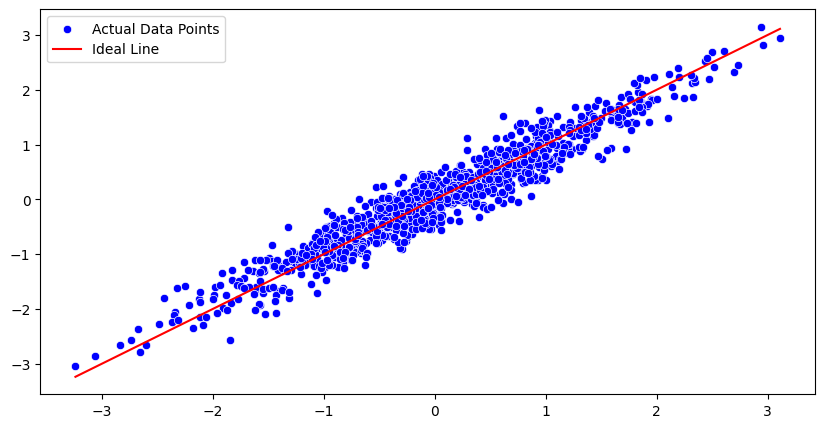

In [67]:
sns.scatterplot(x=y_test, y=y_pred, color="blue", label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [59]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          0.06 |          0.07
         -1.02 |         -1.16
          1.32 |          1.44
         -0.48 |         -0.74
         -0.80 |         -0.68
         -1.42 |         -1.67
         -0.18 |         -0.45
         -1.49 |         -1.06
          0.76 |          0.60
          0.16 |         -0.08
          0.59 |          0.63
          0.13 |          0.19
          1.48 |          1.43
          0.79 |          0.30
          0.59 |          0.44
         -0.32 |         -0.03
         -1.43 |         -1.75
         -0.26 |         -0.76
         -0.45 |         -0.03
          0.44 |         -0.10
         -2.34 |         -2.06
          0.62 |          1.52
          1.54 |          1.76
         -0.09 |         -0.09
         -0.36 |         -0.47
          1.71 |          1.64
          1.60 |          1.52
          0.54 |          0.59
          0.38 |          0.44
          0.74 |          0.88
     

# **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data.

In [60]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-1.97469102e-01  1.03682470e+00 -1.56471213e+00  6.11032455e-01
  5.51640825e-01  1.54091776e+00  3.23678323e-01  9.39194255e-01
 -7.28219352e-01 -4.57267561e-02 -7.57884409e-01 -3.12561040e-01
 -1.55127413e+00 -4.21230088e-01 -5.64855681e-01 -9.68807968e-02
  1.62684613e+00  6.35158799e-01 -9.34638960e-02 -2.79671152e-02
  1.93250968e+00 -1.64525280e+00 -1.88535155e+00 -3.44753127e-02
  3.48552586e-01 -1.76683121e+00 -1.64406306e+00 -7.12932783e-01
 -5.63764049e-01 -9.99714506e-01  1.30784823e+00 -1.60387736e+00
 -7.75991418e-01  4.60506559e-01 -2.73958743e-01  7.66796512e-01
  3.25683927e-03  5.34906348e-01 -4.00302555e-01  1.14988846e+00
 -5.80813994e-01  1.72758582e+00  1.03532093e+00 -2.00331822e+00
 -1.37028378e+00  6.26682276e-01  1.65746976e-01  1.11984970e+00
  7.68650731e-02 -8.04910985e-01 -7.63164317e-01  7.15344461e-02
  2.51338562e-01 -4.81220832e-01  9.83037567e-01  5.71749331e-01
  1.83734357e-01 -1.85060956e-01 -6.79962638e-01  1.95165163e+00
 -7.77779547e-01  2.25025

<Axes: ylabel='Density'>

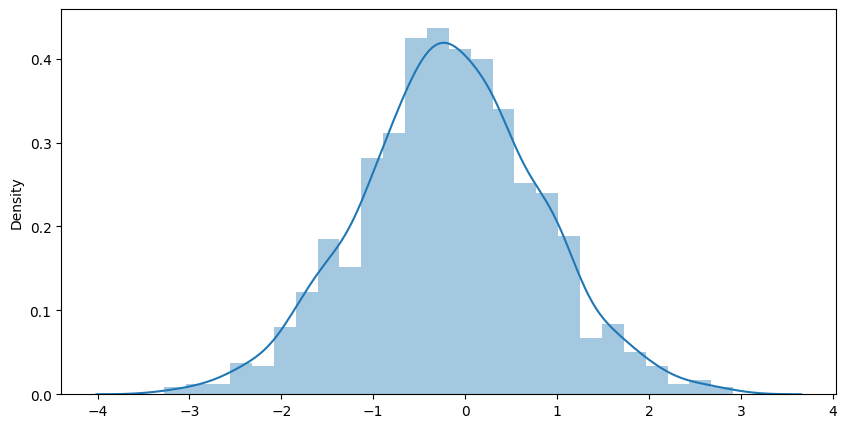

In [61]:
sns.distplot(residual, kde=True)

# **Model Evaluation**

In [68]:
from sklearn.metrics import mean_squared_error
print("Linear Regression Model")
mse= mean_squared_error(y_test,y_pred)
r_square=np.sqrt(mse)

print("Mean Squared Error Value Is: ", mse)
print("R_Square Value Is: ", r_square)

Linear Regression Model
Mean Squared Error Value Is:  0.08101725519794252
R_Square Value Is:  0.28463530209364846


# **Decision Tree Regression**

In [69]:
from sklearn.tree import DecisionTreeRegressor

#create and train the decision Tree model
dn_tree_model= DecisionTreeRegressor()
dn_tree_model.fit(x_train,y_train)

#now make prediction on the test dataset

y_pred_tree = dn_tree_model.predict(x_test)

In [70]:
#Now calculating the mean squared value and Root mean square

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("Decision Tree Mean Square Error is: ", mse_tree)
print("Decision Tree Root Mean Square Error is: ",rmse_tree)


Decision Tree Mean Square Error is:  0.24710802702532264
Decision Tree Root Mean Square Error is:  0.4970996147909618


# **Random Forest**

In [71]:
from sklearn.ensemble import RandomForestRegressor

rdm_forest= RandomForestRegressor()
rdm_forest.fit(x_train, y_train)

y_pred_forest = rdm_forest.predict(x_test)

In [72]:
mse_rfr = mean_squared_error(y_test, y_pred_forest)
rmse_rfr = np.sqrt(mse_rfr)

print("Random Forest Root mean Squared Error is: ", mse_rfr)
print("Random Forest Root mean Squared Error is: ", rmse_rfr)

Random Forest Root mean Squared Error is:  0.11939265424940092
Random Forest Root mean Squared Error is:  0.34553242141570584


# **Gradient Boosting Regression**

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
gbr= GradientBoostingRegressor()

gbr.fit(x_train, y_train)

y_pred_gbr = gbr.predict(x_test)

In [75]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print("Gradient boosting Regression Mean Squared Error is: ", mse_gbr)
print("Gradient boosting Regression Root mean Squared Error is: ", rmse_gbr)

Gradient boosting Regression Mean Squared Error is:  0.0994509204173001
Gradient boosting Regression Root mean Squared Error is:  0.3153583999472665


# **Mean Square Error Report**

1. Without feature scaling
2. With only feature scaling (without target variable)
3. With feature and target variable scaling

# **Without Feature Scaling**

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Without Feature Scaling
models_no_scaling = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor()
}

mse_report_no_scaling = {}

for model_name, model in models_no_scaling.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_report_no_scaling[model_name] = mse

# Print the MSE report for no scaling
print("MSE Report - No Scaling:")
for model, mse in mse_report_no_scaling.items():
    print(f"{model}: {mse}")
    print("-"*90)
    print('\n')


MSE Report - No Scaling:
Decision Tree: 31572218764.13663
------------------------------------------------------------------------------------------


Linear Regression: 10100187858.864885
------------------------------------------------------------------------------------------


Gradient Boosting: 12400765586.93657
------------------------------------------------------------------------------------------


Random Forest: 15106006771.592735
------------------------------------------------------------------------------------------




# **With only Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler


# With Only Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

models_feature_scaling = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor()
}

mse_report_feature_scaling = {}

for model_name, model in models_feature_scaling.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_report_feature_scaling[model_name] = mse

# Print the MSE report for feature scaling
print("MSE Report - Feature Scaling:")
for model, mse in mse_report_feature_scaling.items():
    print(f"{model}: {mse}")
    print("-"*90)
    print('\n')


MSE Report - Feature Scaling:
Decision Tree: 32160008260.70536
------------------------------------------------------------------------------------------


Linear Regression: 10100187858.8676
------------------------------------------------------------------------------------------


Gradient Boosting: 12399756692.85341
------------------------------------------------------------------------------------------


Random Forest: 14953082332.480968
------------------------------------------------------------------------------------------




# **With Feature and Target Variable Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler

# With Feature and Target Variable Scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

models_feature_target_scaling = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor()
}

mse_report_feature_target_scaling = {}

for model_name, model in models_feature_target_scaling.items():
    model.fit(x_train_scaled, y_train_scaled)
    y_pred_scaled = model.predict(x_test_scaled)
    y_pred_original_scale = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    mse = mean_squared_error(y_test, y_pred_original_scale)
    mse_report_feature_target_scaling[model_name] = mse

# Print the MSE report for feature and target scaling
print("MSE Report - Feature and Target Scaling:")
for model, mse in mse_report_feature_target_scaling.items():
    print(f"{model}: {mse}")
    print("-"*90)
    print('\n')


MSE Report - Feature and Target Scaling:
Decision Tree: 0.24818654138689614
------------------------------------------------------------------------------------------


Linear Regression: 0.08101725519794249
------------------------------------------------------------------------------------------


Gradient Boosting: 0.09952931680168405
------------------------------------------------------------------------------------------


Random Forest: 0.12226662719211899
------------------------------------------------------------------------------------------


